## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import csv

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df=pd.DataFrame(mouse_metadata)
study_df=pd.DataFrame(study_results)
merged_data=pd.merge(left=mouse_df, right=study_df, left_on='Mouse ID', right_on='Mouse ID')
merged_data=merged_data.rename(columns={'Mouse ID': 'mouse_id'})
# Display the data table for preview
print (mouse_df.head())
print (study_df.head())
merged_data.head(10)

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


,mouse_id,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
m_count=merged_data.mouse_id.unique()
print (len(m_count))
print (len(merged_data['Timepoint']))

249
1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
scrubbed_data=merged_data.drop_duplicates(['Timepoint', 'mouse_id'])
m_count_s=scrubbed_data.mouse_id.unique()
print (len(m_count_s))
print (len(scrubbed_data['Timepoint']))

249
1888


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = merged_data.loc[merged_data.duplicated(['Timepoint', 'mouse_id']), :]
duplicates

,mouse_id,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df=pd.DataFrame(scrubbed_data)
df=df.rename(columns={'Tumor Volume (mm3)': 'tumor_volume_mm3'})
df.head(10)
# df.to_excel("output.xlsx")

,mouse_id,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,tumor_volume_mm3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice in the clean DataFrame.
print (len(df.mouse_id.unique()))
print (len(df['mouse_id']))

249
1888


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# df.describe
df[["tumor_volume_mm3"]].describe()

# groupby.agg([sem])
# This method is the most straighforward, creating multiple series and putting them all together at the end


,tumor_volume_mm3
count,1888.000000
mean,50.449276
std,8.904565
min,22.050126
25%,45.000000
50%,48.951421
75%,56.324075
max,78.567014


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_summary=df.groupby('Drug Regimen').tumor_volume_mm3.describe()
# sem=df.sem()
# This method produces everything in a single groupby function
regimen_summary
# print (sem.head())

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

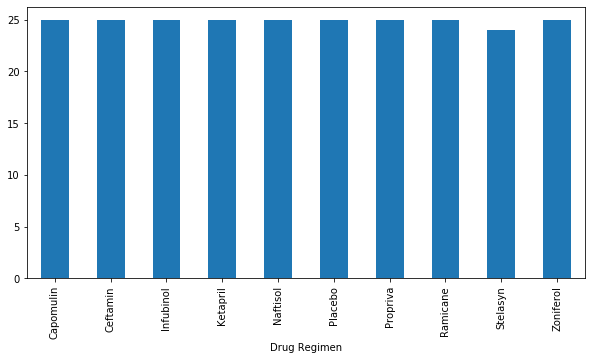

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treatment_group = df.groupby('Drug Regimen')
# Count how many times each mouse appears in that group
count_mice = treatment_group['mouse_id'].nunique()

panda_plot=count_mice.plot.bar(figsize=(10, 5),)
panda_plot

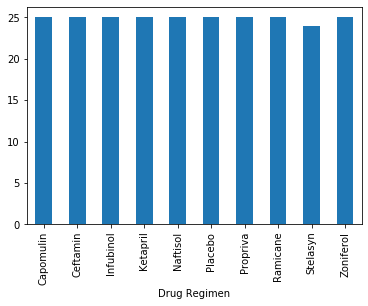

In [24]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treatment_chart = count_mice.plot(kind='bar')
# plt.plot(['Drug Regimen'], 'count_mice')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027334715A08>],
      dtype=object)

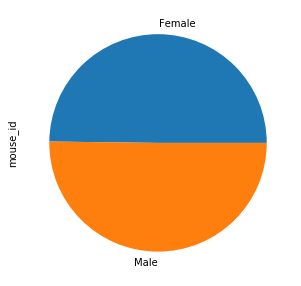

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = df.groupby('Sex')['mouse_id'].nunique()
pandapie =gender_group.plot.pie(subplots=True, figsize=(10, 5),)
pandapie

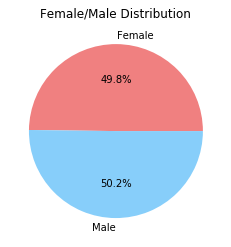

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex=['Female', 'Male']
colors=["lightcoral", "lightskyblue"]
plt.pie(gender_group, labels=Sex, colors=colors, autopct="%1.1f%%",)
plt.title("Female/Male Distribution")
# gender_group
plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# list (df['tumor_volume_mm3'].groupby(df['Drug Regimen']))
# df.groupby('Drug Regimen').agg({'Timepoint': 'max'}, {'tumor_volume_mm3': 'sum' })

# Start by getting the last (greatest) timepoint for each mouse
# final_volume=df.groupby(['Drug Regimen'])['Timepoint'].idxmax()
# # print (final_volume)

# final_volume=df.groupby('Drug Regimen').Timepoint.max()
# # final_volume=df.groupby('Drug Regimen').size().reset_index(Timepoint='max')
# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# # final_volume_df=df.loc[df.reset_index().groupby(['Drug Regimen'])['tumor_volume_mm3'].idxmax()]
# # # final_volume_df=pd.DataFrame(final_volume)
# final_volume_df=pd.DataFrame(final_volume)
# final_volume_df

condition = df["Timepoint"] == 45
filtered_df = df[condition]
print (filtered_df)


     mouse_id Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
9        k403     Ramicane    Male          21          16         45   
19       s185    Capomulin  Female           3          17         45   
29       x401    Capomulin  Female          16          15         45   
39       m601    Capomulin    Male          22          17         45   
49       g791     Ramicane    Male          11          16         45   
...       ...          ...     ...         ...         ...        ...   
1845     y769     Ceftamin  Female           6          27         45   
1855     y865     Ceftamin    Male          23          26         45   
1872     z581    Infubinol  Female          24          25         45   
1882     z795     Naftisol  Female          13          29         45   
1892     z969     Naftisol    Male           9          30         45   

      tumor_volume_mm3  Metastatic Sites  
9            22.050126                 1  
19           23.343598               

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
